<a href="https://colab.research.google.com/github/RoshanJamthe/EDA_Play_Store_App_Review_Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**STEP 1: Importing essential libraries and Loading the Dataset**




In this step, import essential libraries


*   numpy and pandas for data analysis
*   seaborn and matplotlib.pyplot for data visualization.

Load the dataset which is in .csv format.





In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the Play Store Data.csv file 
play_store_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/1. EDA - Playstore App review analysis/Play Store Data.csv")

# loading the User Reviews.csv file 
user_reviews_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/1. EDA - Playstore App review analysis/User Reviews.csv")

In [4]:
# View the dataframe df
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# View the data types of each feature
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# View the dataframe user_reviews_df
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Here marks 'The End' of 'STEP 1'.

Moving forward to clean the data.

# **STEP 2: Data wrangling**



This step is also known as Pre-processing.

In this step, clean the data. 

Looking for and handling
*   NAN/Null/ Missing values
*   Duplicate entries
*   Mismatched entries

Also attaining,
*   Standardized Columns
*   Transformed Columns (Original: Object data type column to Transformed column: Numeric data type)






## **1) Handling Null values from user_reviews_df DataFrame**

In [7]:
# Cleaning the data from user_reviews_df, since it has NAN values.
user_reviews_df = user_reviews_df[~user_reviews_df['Sentiment_Subjectivity'].isna()]

Adding a 'Sentiment_Score' column to user_reviews_df dataframe, which will be used later on.

In [8]:
# Adding Sentiment_Score column which is the product of Sentiment_Polarity and Sentiment_Subjectivity
user_reviews_df['Sentiment_Score'] = user_reviews_df['Sentiment_Polarity'] * user_reviews_df['Sentiment_Subjectivity']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 2) **Getting rid of Duplicate entries**
Sometiems given Dataset can have Duplicate value.
Duplicate values, if large in number can significantly deviate the results of summarization.
Duplicate values also makes the dataset unnecessarily bulky. 


In [9]:
# Check the data info first
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# Check whether there are duplicate entries in App column
boolean = play_store_df['App'].duplicated().any()
boolean

True

In [11]:
# Check the count of each app, this will clearly indicate the presence of duplicates of each app quantitatively.
play_store_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [12]:
# Check for top entry if the data contain of this duplicate across all features is same or not.
play_store_df[play_store_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [13]:
# We can't go through each row of data to search for duplicate, 
# however using following code, if there are any duplicates present in the data they will be deleted
# sorting by such that highest number of reviews will be on top

play_store_df.sort_values("Reviews", ascending=False,inplace = True)

# dropping ALL duplicate values from the 'df' using inplace, keeping the ones with first entry only
play_store_df.drop_duplicates( subset="App",keep='first',inplace = True)

In [14]:
# Verify the change
play_store_df[play_store_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [15]:
# Verify the change
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 2989 to 4177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


So we have successfully removed the duplicate entries. The same can be verified by the difference in the non-null values.

We will take care of NaN/ Null or missing values from df DataFrame in futher sections as we face them.

## **3) Handling Mis-matched data**


In [16]:
play_store_df.reset_index(inplace=True)

In [17]:
# Easiest way to find the mismatch data for the df DataFrame is running (rating >5) querry on "Rating" column. Since maximum rating is 5.
play_store_df[play_store_df['Rating']>5]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4484,10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
# Drop the row with the mis-match data using its index
play_store_df.drop(play_store_df.index[4484],inplace=True)

In [19]:
# Check for the change
play_store_df[play_store_df['Rating']>5]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
# Run (rating < 0) querry as well
play_store_df[play_store_df['Rating']< 0]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [21]:
# View the DataFrame
play_store_df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
1,4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2,2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3,3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
4,3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


In [22]:
# Drop the unnecessary index column
play_store_df.drop(columns=['index'],inplace=True)

In [23]:
# View the DataFrame
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


The mis-matched data got removed

## **4) Standardized Column**


### **a) Standardizing 'Size' column to size in MB**

*   Replace 'Varies with device' to NaN since we can't guess the size and it can be anything  
*   Remove any alphabet or non-numeric character
*   If it has 'k' i.e. the size is in kb, then dividing by 1000 to convert it into Mb
*   Final result should be Float datatype values rounded upto 2 digits.






In [24]:
# Converting KB to MB 
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [25]:
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x))
play_store_df['Size'] = play_store_df['Size'].round(2)

In [26]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,GollerCepte Live Score,SPORTS,4.2,9992,31.00,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.09,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18.00,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33.00,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.00,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


## **5) Transform Column to appropriate and usable data type format**

### **a) "Price" Column to numeric format**


In [27]:
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [28]:
play_store_df.rename(columns = {'Price':'Price($)'}, inplace = True)

### **b) "Reviews" Column to numeric format**


In [29]:
# Converting reviews column to number format
play_store_df['Reviews'] = pd.to_numeric(play_store_df['Reviews'].str.replace('$',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


## **c) "Installs" Column to usable format**
The "Installs" column in the DataFrame is in the 'object' format we need to convert it into number format for mathematical simplicity.

In [30]:
# Creating a function that converts 'Installs' column's string values to int format
def convert_to_int(string):
  try:
    num = int("".join([i for i in string if i.isdigit()]))
    return num
  except:
    return 0

In [31]:
# Applying the function to the 'Installs' column
play_store_df["Installs"]=play_store_df["Installs"].apply(convert_to_int)

# Let's check the dataset now
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,GollerCepte Live Score,SPORTS,4.2,9992,31.00,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.09,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18.00,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33.00,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.00,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


In [32]:
# Check min and max entries in Installs column
play_store_df['Installs'].min(), play_store_df['Installs'].max()

(0, 1000000000)

In [33]:
# Changing 0 to 1 so we can apply log with base 10 without giving error n also changing 0 to 1 will have minimalistic inconsiderable change for this database.
def convert_0_to_1(value):
  if value == 0:
    return 1
  else:
    return value

In [34]:
# Applying the above function
play_store_df["Installs"]=play_store_df["Installs"].apply(convert_0_to_1)

In [35]:
# Check min and max entries in Installs column
play_store_df['Installs'].min(), play_store_df['Installs'].max()

(1, 1000000000)

In [36]:
# It is still difficult to read the Installs column, so create a column of log base 10 values
play_store_df['Installs_log'] = np.log10(play_store_df['Installs'])

In [37]:
# View the DataFrame
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log
0,GollerCepte Live Score,SPORTS,4.2,9992,31.00,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,6.00000
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.09,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,5.00000
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18.00,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,6.00000
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33.00,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,6.00000
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.00,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,5.69897


## **d) Android Version to Minimum Android Version Column**

In [38]:
play_store_df['Android Ver'].unique()

array(['4.1 and up', '2.2 and up', '4.3 and up', '5.0 and up',
       '2.1 and up', '4.0.3 and up', 'Varies with device', '2.3 and up',
       '4.2 and up', '4.0 and up', '4.4 and up', '7.0 and up',
       '1.6 and up', '2.3.3 and up', '3.0 and up', '1.5 and up',
       '5.1 and up', '6.0 and up', '3.1 and up', '2.0 and up',
       '4.1 - 7.1.1', '3.2 and up', '4.4W and up', '7.1 and up',
       '8.0 and up', '2.0.1 and up', '2.2 - 7.1.1', '4.0.3 - 7.1.1',
       '5.0 - 6.0', '1.0 and up', '5.0 - 8.0', nan, '7.0 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

This data is not usbale in current format
*   Replace 'Varies with device' to NaN since different App's min android version can be different
*   Achieve float datatype 

In [39]:
# Changing Android Version column to only with valid min value number string
def for_android_version(value):
  try:
    # Since Min Android version which Varies with device means it is supportable to most android devices but unclear where each app's min Android version requirement is.
    if value == 'Varies with device':
      return np.nan

    else:
      return value[:3]
  except:
    return value

In [40]:
# Create a new dataframe to save this change
df_new = play_store_df[~play_store_df['Android Ver'].isna()]

In [41]:
# Apply the function 'for_android_version' to 'Android Ver' column and create a new column
df_new['Min Android Ver'] = df_new['Android Ver'].apply(for_android_version)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
# Check for the change
df_new['Min Android Ver'].unique()

array(['4.1', '2.2', '4.3', '5.0', '2.1', '4.0', nan, '2.3', '4.2', '4.4',
       '7.0', '1.6', '3.0', '1.5', '5.1', '6.0', '3.1', '2.0', '3.2',
       '7.1', '8.0', '1.0'], dtype=object)

In [43]:
# Convert dtype Object to Float, then it will be easy to use this table
df_new['Min Android Ver'] = df_new['Min Android Ver'].apply(lambda x: float(x))
df_new['Min Android Ver'] = df_new['Min Android Ver'].round(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
# Check for the change
df_new['Min Android Ver'].unique()

array([4.1, 2.2, 4.3, 5. , 2.1, 4. , nan, 2.3, 4.2, 4.4, 7. , 1.6, 3. ,
       1.5, 5.1, 6. , 3.1, 2. , 3.2, 7.1, 8. , 1. ])

In [45]:
df_new = df_new[~df_new['Min Android Ver'].isna()]

## Here marks the end of pre-processing. Data Cleaning is achieved. By the end of this step, we are with 3 DataFrames using which the data analysis will be done.


*   user_reviews_df - With a new column 'Sentiment_marks'
*   play_store_df - Main DataFrame
*   df_new - df with a new column 'Min Android ver' 







# **STEP 3: Extracting Statistics from DataFrame**


In [46]:
# View the basic statistical details of the Main DataFrame
play_store_df.describe()

,Rating,Reviews,Size,Installs,Price($),Installs_log
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000,9659.000000
mean,4.173084,2.165899e+05,20.393057,7.780208e+06,1.099299,4.641342
std,0.536522,1.831398e+06,21.825808,5.376003e+07,16.852152,1.909788
min,1.000000,0.000000e+00,0.010000,1.000000e+00,0.000000,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000,3.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000,5.000000
75%,4.500000,2.936550e+04,28.000000,1.000000e+06,0.000000,6.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,9.000000


The inferences drawn from above table are as follows,

*   The count values is not same for all the features. That means there are still missing values in features like Rating and Size. Appropriate actions will be taken as they come in picture.

*   Since it is large database, Mean and Mode will be termed as primary statistics over Median.

*   Large variance is observed in values of Reviews and Installs feature. These features may turn out very important and give very clear conclusions

*   Less variance is observed in Rating, Size adn Price column. Need to be careful and may require deep level analysis to draw conclusions.






# **STEP 4: Data Exploration and Visualizations**

*   Explore various features (columns) of the Data.
*   Draw clear conclusions on features whether they are 'KEY' for app engagement and success.
*   Ask the normal non-brainy questions to help out with the data analysis.
*   Ask the question like relevancy of one feature to another and validate the same.

*   Comment out the inferences and use visualizations or tables to bolster the claim.
*   Conclusions with remarks for the app-making bussiness to drive it to success.


### *Setting parameters for the plots*

In [47]:
# Use 'darkgrid' for 'Style' which will help colors to appear more attractively. 
sns.set_style('darkgrid')

# Set standard font size of 12
plt.rcParams['font.size'] = 13

# Set standard figsize of 14*7
plt.rcParams['figure.figsize'] = (14, 7)

# Set face color for the viuals
plt.rcParams['figure.facecolor'] = '#00000000'

## **1) Analysis focused on "Rating" feature**



In [48]:
# Wasn't there Null rows in 'Rating' feature. View it!
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9659
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price($)        9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
 13  Installs_log    9659 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


Here have the primary concern about 'Rating' column. 

Take appropriate actions to manipulate other features according to 'Rating'.

Clean the data off the 'NaN' Rating values and store it in the new DataFrame. The ratings_df DataFrame will act as primary DataFrame for this section.


In [49]:
ratings_df = play_store_df[~play_store_df["Rating"].isna()]

### **a) "Rating" Distribution**

Text(0.5, 1.0, 'Rating Distribution')

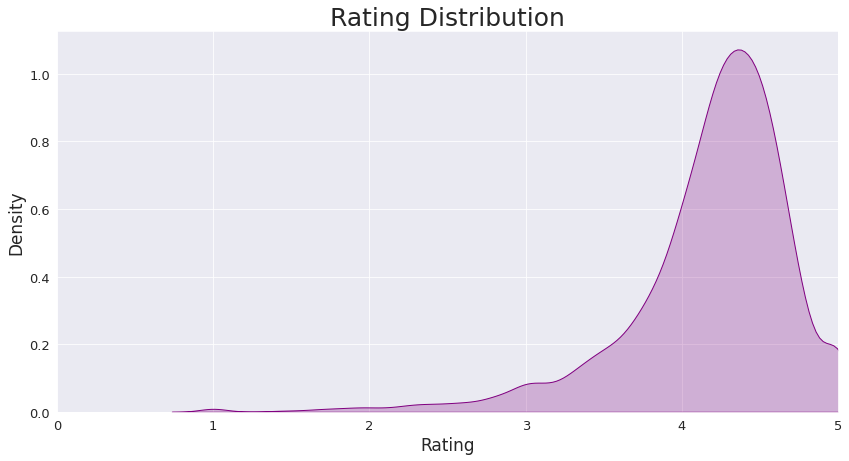

In [50]:
sns.kdeplot(play_store_df['Rating'], color="purple", shade = True,fill =True).set(xlim=(0, 5))
plt.ylabel('Density',fontsize=17)
plt.xlabel('Rating',fontsize=17)
plt.title('Rating Distribution',fontsize=25)

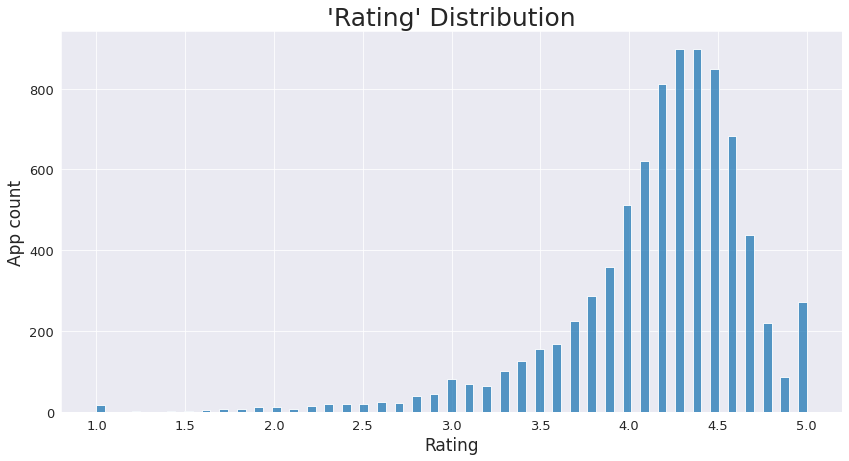

In [51]:
#plt.title("Appwise Rating Distribution")
sns.histplot(ratings_df['Rating'])
plt.xlabel('Rating',fontsize=17)
plt.ylabel('App count',fontsize=17)
plt.title("'Rating' Distribution",fontsize=25)
plt.show()

In [52]:
ratings_df['Rating'].describe()

count    8196.000000
mean        4.173084
std         0.536522
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### **Inference: Upon observing a right skewed distribution with peak at rating value of 4.3, it is clear to say that Apps are rated good on average.**

1.   4.173 is the mean rating value while 4.3 is the median rating value. This is a pretty good number (Rating > 4.0 (80%)) to infer that Apps are rated good on average.
2.   These inference arises the question that 'Do most people have positive sentiment about Apps based on their experience?'. This particular question will be dealt with later on.
3.   Is there a relation between 'Sentiment' and 'Rating'?
4.   Higher 'Rating' more 'Installations'?



### **b) Q.1. Relation between 'Rating' and 'Sentiment_Score'?**

In [53]:
# Join ratings_df and user_reviews_df on 'App' and store the results in new DataFrame 
rating_with_user_reviews_df = pd.merge(ratings_df, user_reviews_df, how="inner", on=["App"])

In [54]:
# View the new DataFrame
rating_with_user_reviews_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,5.69897,I'm grateful booking engine dreamtrips. I've a...,Positive,0.2000,0.2000,0.040000
1,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,5.69897,"This great app. I One book plane, hotel, dream...",Positive,0.8500,0.8750,0.743750
2,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,5.69897,Its slow rovia keeps going back disappointed g...,Negative,-0.1375,0.4125,-0.056719
3,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,5.69897,Try get dreams trips Germany UK,Neutral,0.0000,0.0000,0.000000
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.0,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,5.69897,I cant open travelbook samsung handphone,Neutral,0.0000,0.5000,0.000000


In [55]:
# Perform the groupby on 'Rating' feature with sum of 'Sentiment_marks' and store it in new DataFrame
rating_with_sentiment_score_df = rating_with_user_reviews_df[['Rating','Sentiment_Score']].groupby("Rating").agg({'Sentiment_Score':'sum'}).reset_index().rename(columns={'Rating':'Rating'}).sort_values('Rating',ascending=False)

**Use 5 pointer classification of 'Rating'. Differentiate 'Ratings' in Range of,**

*   [0.0 - 1.0] terming it as 'Very Bad' Rating 
*   [1.0 - 2.0] terming it as 'Bad' Rating 
*   [2.0 - 3.0] terming it as 'Okay' Rating 
*   [3.0 - 4.0] terming it as 'Good' Rating 
*   [4.0 - 5.0] terming it as 'Very Good' Rating 



In [56]:
# Modify the DataFrame
rating_with_sentiment_score_df = rating_with_sentiment_score_df.groupby(pd.cut(rating_with_sentiment_score_df["Rating"], np.arange(0.00, 5.00+1.00, 1.0),labels=['Very Bad','Bad','Okay','Good','Very Good'])).agg({'Sentiment_Score':'sum'}).reset_index().rename(columns={'Rating':'Rating'}).sort_values('Rating',ascending=False)

In [57]:
# View the DataFrame 'rating_with_Sentiment_marks'
rating_with_sentiment_score_df

,Rating,Sentiment_Score
4,Very Good,3561.854507
3,Good,497.386141
2,Okay,-7.098363
1,Bad,0.000000
0,Very Bad,0.000000


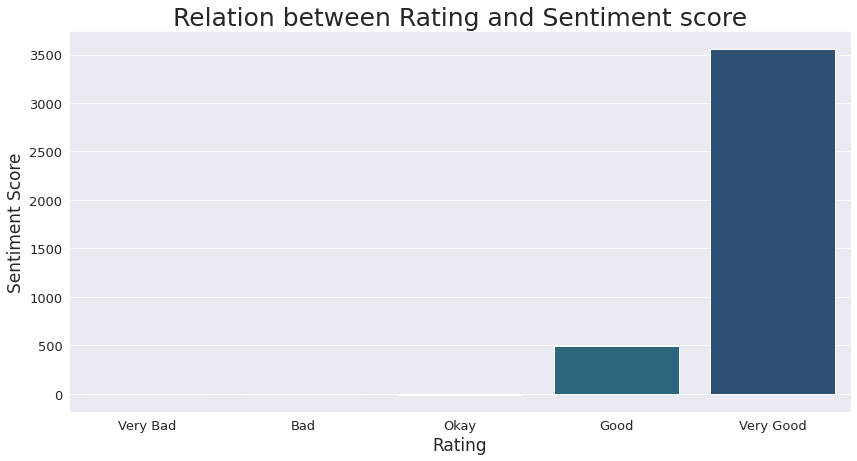

In [58]:
# Get the plot of 'Rating' vs 'Sentiment_marks'
sns.barplot(x=rating_with_sentiment_score_df['Rating'],y=rating_with_sentiment_score_df['Sentiment_Score'],palette = 'crest')
plt.xlabel('Rating',fontsize=17)
plt.ylabel('Sentiment Score',fontsize=17)
plt.title('Relation between Rating and Sentiment score',fontsize=25)
plt.show()

#### **Observation: It is likely that when rating is above "Okay" then only it has 'Positive' sentiment score. Also sentiment score increases as the rating increases**



### **c) Q.2. Relation between 'Rating' and 'Number of Installations'?**

In [59]:
# Get essential features by grouping over 'Rating' column
rating_wise = play_store_df[['Rating','App','Reviews','Installs','Size']].groupby("Rating").agg({'App':'count','Reviews':'sum','Installs':'sum','Size':'mean'}).reset_index().rename(columns={'Rating':'Rating'}).sort_values('Rating',ascending=False)

In [60]:
# Use 5 poniter classification of 'Rating '
rating_wise = rating_wise.groupby(pd.cut(rating_wise["Rating"], np.arange(0, 5.00+1.0, 1.0),labels=['Very Bad','Bad','Okay','Good','Very Good'])).agg({'App':'sum','Reviews':'sum','Installs':'sum','Size':'mean'}).reset_index().rename(columns={'Rating':'Rating'})

In [61]:
# It is still difficult to read the Installs column, so create a column of log base 10 values
rating_wise['Installs_log'] = np.log10(rating_wise['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


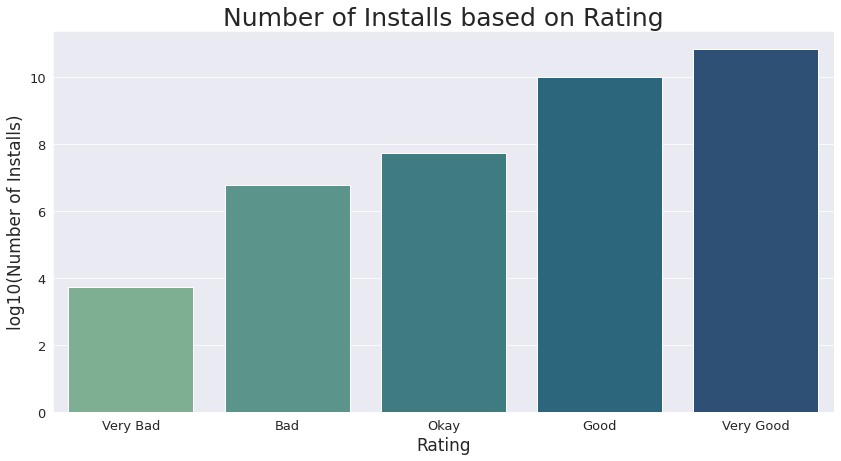

In [62]:
plt.xticks(rotation=0)
sns.barplot(rating_wise['Rating'],rating_wise['Installs_log'],palette ='crest')
plt.xlabel('Rating',fontsize=17)
plt.ylabel('log10(Number of Installs)',fontsize=17)
plt.title('Number of Installs based on Rating',fontsize=25)
plt.show()

#### **Observation: As Rating gets higher Number of Installations increases dramatically.**


### **d) Details of top 5 highest rated apps having 10 million+ installs?**

In [63]:
play_store_df[['App','Rating','Installs']].sort_values('Rating',ascending =False).head()

,App,Rating,Installs
6286,A-Y Collection,5.0,100
1909,CR Tracker for Chests,5.0,50
8634,Oración CX,5.0,5000
6330,Hum Ek Hain 2.02,5.0,10
331,DW Timer,5.0,100


In [64]:
play_store_df[play_store_df['Installs_log']>=7][['App','Category','Rating','Reviews','Type','Installs']].sort_values(['Rating','Reviews'],ascending=False).head()

,App,Category,Rating,Reviews,Type,Installs
229,JW Library,BOOKS_AND_REFERENCE,4.9,922752,Free,10000000
4972,Six Pack in 30 Days - Abs Workout,HEALTH_AND_FITNESS,4.9,272337,Free,10000000
2911,Period Tracker - Period Calendar Ovulation Tra...,HEALTH_AND_FITNESS,4.8,4559407,Free,100000000
5163,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,4.8,2588730,Free,50000000
7317,Eternium,FAMILY,4.8,1506783,Free,10000000


## **2) Analysis focused on 'User Reviews Data' DataFrame**



In [65]:
# View the DataFrame
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.072115
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.350000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.300000


Find out the distribution of Sentiment. 

Find out the distribution of Subjectivity.

Does there exist a corelation between subjectivity and polarity?.


### **a) "Sentiment" Distribution**

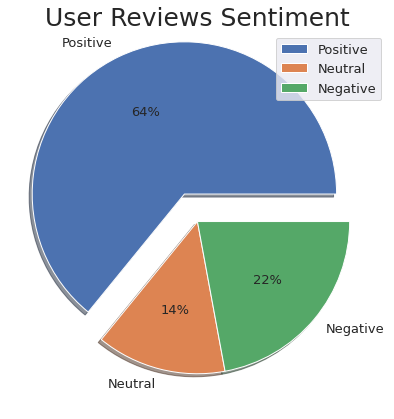

In [66]:
# Preparation for Pie Plot
#define data
data = (user_reviews_df[user_reviews_df['Sentiment'] == 'Positive']['Sentiment'].count(),user_reviews_df[user_reviews_df['Sentiment'] == 'Neutral']['Sentiment'].count(),user_reviews_df[user_reviews_df['Sentiment'] == 'Negative']['Sentiment'].count())
labels = ['Positive', 'Neutral', 'Negative']
myexplode = [0.2, 0, 0]

#define Seaborn color palette to use
colors = sns.color_palette('deep')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, explode= myexplode, shadow = True, autopct='%.0f%%')
plt.legend()
plt.title("User Reviews Sentiment", fontsize = 25)
plt.show()

#### **Conclusion: Positive sentiments fairly dominates. Healthy 20% negative sentiment shows that there are areas to improve.**


###**b) "Subjectivity" Distribution**

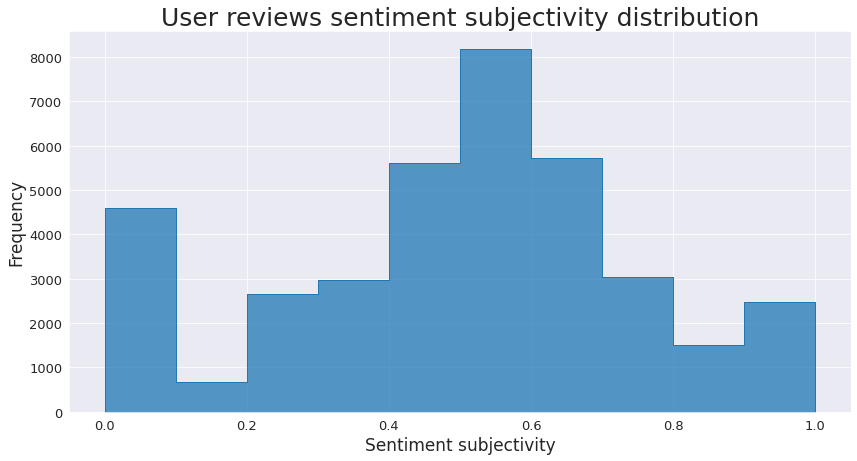

In [67]:
# Plot histogram 
sns.histplot(user_reviews_df['Sentiment_Subjectivity'],bins=10,element='step',palette = 'crest')
plt.xlabel('Sentiment subjectivity',fontsize=17)
plt.ylabel('Frequency',fontsize=17)
plt.title('User reviews sentiment subjectivity distribution',fontsize=25)
plt.show()

#### **Conclusion: Sentiment Subjectivity lies mostly in range (0.4 - 0.7), i.e. most number of users gives reviews based on their experience.**



### **c) Q.3) Does there exist a corelation between "Sentiment Subjectivity" and "Sentiment Polarity"?**

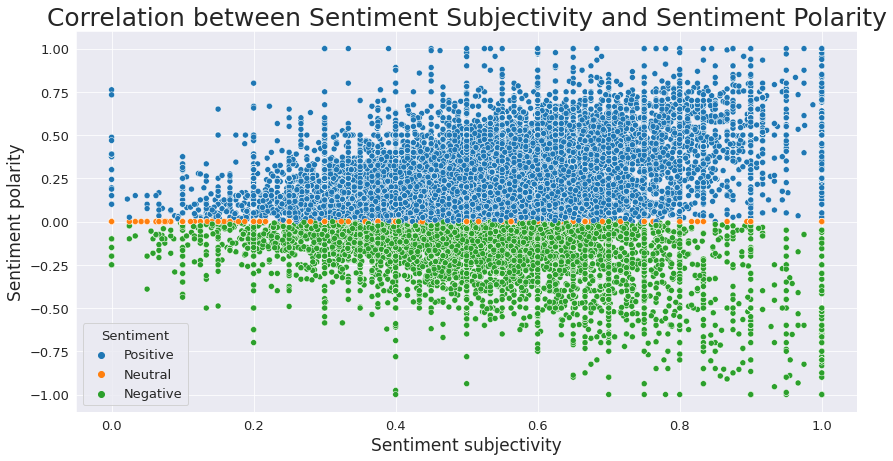

In [68]:
# Draw a scatter plot with subjectivity on x-axis
sns.scatterplot(x=user_reviews_df['Sentiment_Subjectivity'],y=user_reviews_df['Sentiment_Polarity'],hue = user_reviews_df['Sentiment'])
plt.xlabel('Sentiment subjectivity',fontsize=17)
plt.ylabel('Sentiment polarity', fontsize=17)
plt.title('Correlation between Sentiment Subjectivity and Sentiment Polarity',fontsize=25)
plt.show()

#### **Conclusion: There appears to be no corelation between Sentiment Subjectivity and Polarity.**


## **3) Analysis focused on "App Size"**



Clean the data off the 'NaN' Rating values and store it in the new DataFrame. The size_df DataFrame will act as primary DataFrame for this section.


In [69]:
# There are NaN values in size feature. Take appropriate action.
size_df = play_store_df[~play_store_df["Size"].isna()]

In [70]:
size_df.describe()

,Rating,Reviews,Size,Installs,Price($),Installs_log
count,7027.000000,8.432000e+03,8432.000000,8.432000e+03,8432.000000,8432.000000
mean,4.160509,1.206194e+05,20.393057,3.722563e+06,1.225972,4.414375
std,0.559064,9.364630e+05,21.825808,2.482923e+07,18.028685,1.851949
min,1.000000,0.000000e+00,0.010000,1.000000e+00,0.000000,0.000000
25%,4.000000,1.700000e+01,4.600000,1.000000e+03,0.000000,3.000000
50%,4.300000,4.775000e+02,12.000000,5.000000e+04,0.000000,4.698970
75%,4.500000,1.566725e+04,28.000000,1.000000e+06,0.000000,6.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,400.000000,9.000000


### **a) App count based on app size**


In [71]:
# Perform groupby on 'Size' feature and take appropriate action on relevant features needed
size_wise = play_store_df[['App','Reviews','Installs','Size']].groupby("Size").agg({'App':'count','Reviews':'sum','Installs':'sum'}).reset_index().rename(columns={'Size':'Size'}).sort_values('Size',ascending=False)

In [72]:
size_wise= size_wise.groupby(pd.cut(size_wise["Size"], np.arange(0, 100.00+20.00, 20))).agg({'App':'sum','Reviews':'sum','Installs':'sum'}).reset_index().rename(columns={'Size':'Size_range'}).sort_values('App',ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


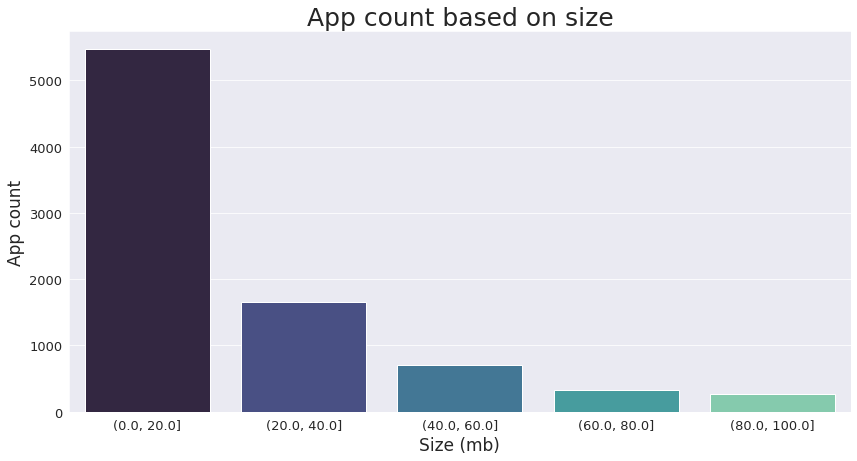

In [73]:
# Plot the chart
plt.xticks(rotation=0)
sns.barplot(size_wise['Size_range'],size_wise['App'],palette="mako")
plt.xlabel('Size (mb)',fontsize=17)
plt.ylabel('App count', fontsize=17)
plt.title('App count based on size',fontsize=25)
plt.show()

#### **Conclusion: Most apps have size below 20mb. And mean app size is around 20.4mb while median app size is 12mb.**



### **b) Q.4) Relation between size and no. of installs**

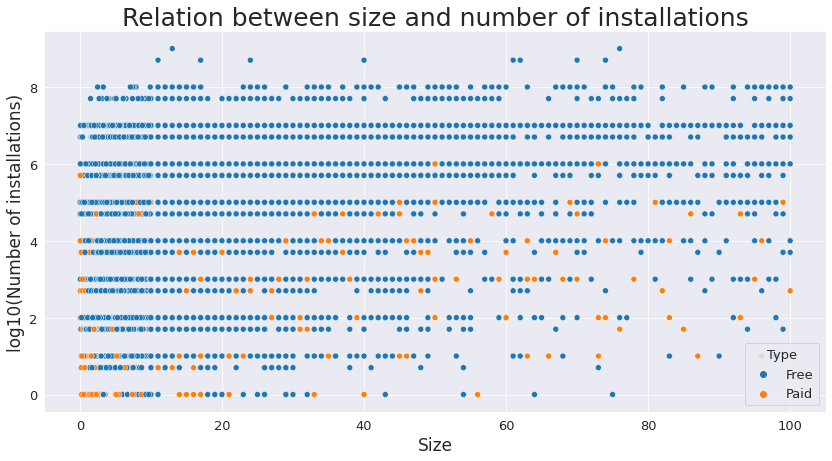

In [74]:
# Plot the scatter chart of size vs number of installations
sns.scatterplot(x=size_df['Size'],y=size_df['Installs_log'],hue=size_df['Type'])
plt.xlabel('Size',fontsize=17)
plt.ylabel('log10(Number of installations)', fontsize=17)
plt.title('Relation between size and number of installations',fontsize=25)
plt.show()

#### **Observation : As the App size increases number of installations decreases. But this can be misleading so lets find out one more relation, i.e. app size vs avg installs**
>**One more inference can be drawn from above plot that number of installations for free apps is far higher than number of installations for paid apps.**

### **c) Q.5) Does small app size engages more users?**

In [75]:
size_wise['avg_installs']  = size_wise['Installs']/size_wise['App']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


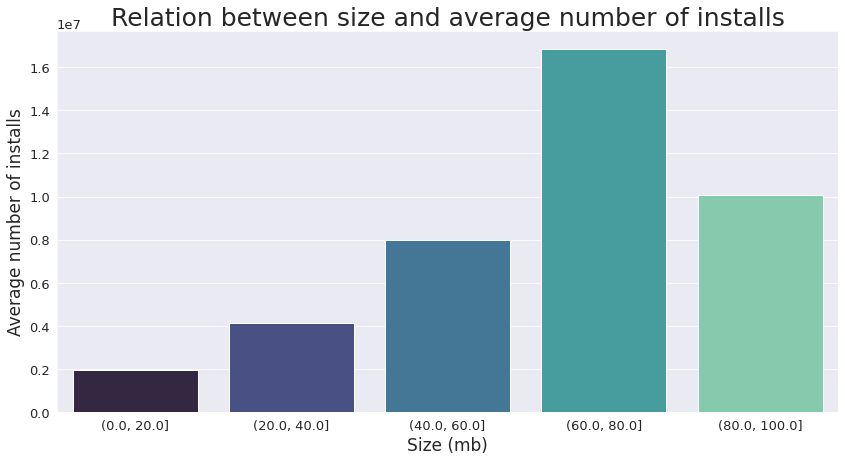

In [76]:
# Plot the bar chart of size vs number of installations
plt.xticks(rotation=0)
sns.barplot(size_wise['Size_range'],size_wise['avg_installs'],palette="mako")
plt.xlabel('Size (mb)',fontsize=17)
plt.ylabel('Average number of installs', fontsize=17)
plt.title('Relation between size and average number of installs',fontsize=25)
plt.show()

In [77]:
size_wise['avg_reviews']  = size_wise['Reviews']/size_wise['App']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


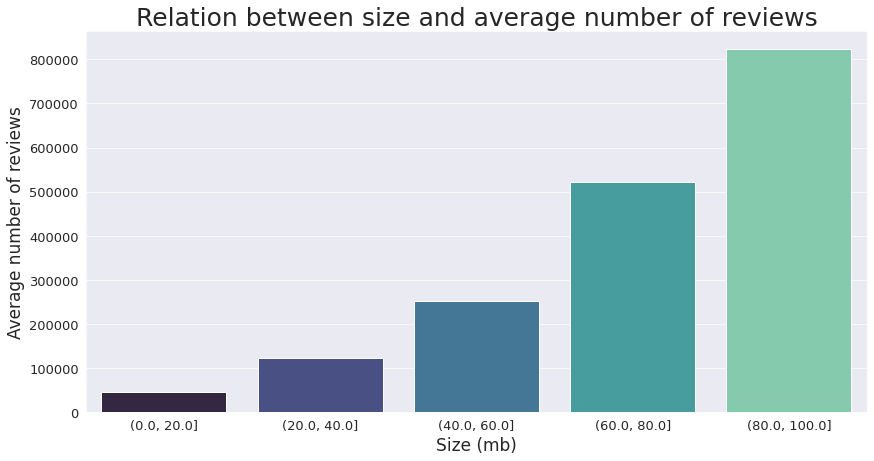

In [78]:
plt.xticks(rotation=0)
sns.barplot(size_wise['Size_range'],size_wise['avg_reviews'],palette="mako")
plt.xlabel('Size (mb)',fontsize=17)
plt.ylabel('Average number of reviews', fontsize=17)
plt.title('Relation between size and average number of reviews',fontsize=25)
plt.show()

#### **Observation : It's evident that small app size doesn't engage most users.**


## **4) Impact of "Min Android Version" support**

In [79]:
# View the df_new DataFrame
df_new.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Min Android Ver
0,GollerCepte Live Score,SPORTS,4.2,9992,31.00,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,6.00000,4.1
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.09,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,5.00000,2.2
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18.00,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,6.00000,4.3
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33.00,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,6.00000,5.0
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.00,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,5.69897,5.0


In [80]:
# Perform groupby on Min Android Ver column
Android_Ver_wise = df_new[['Min Android Ver','App','Reviews','Installs','Size']].groupby('Min Android Ver').agg({'App':'count','Reviews':'sum','Installs':'sum','Size':'mean'}).reset_index().rename(columns={'Min Android Ver':'Min Android Ver'}).sort_values('Min Android Ver',ascending=False)

In [81]:
Android_Ver_wise['Installs_log'] = np.log10(Android_Ver_wise['Installs'])

In [82]:
Android_Ver_wise.head()

,Min Android Ver,App,Reviews,Installs,Size,Installs_log
20,8.0,6,817,1510106,20.083333,6.179007
19,7.1,3,80611,101050000,32.005000,8.004536
18,7.0,43,146145,224509600,23.894634,8.351235
17,6.0,54,973666,52646391,19.463333,7.721369
16,5.1,22,106218,6421760,24.062381,6.807654


###**a) Q.6) What is that Min Android Version support the app maker should target?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


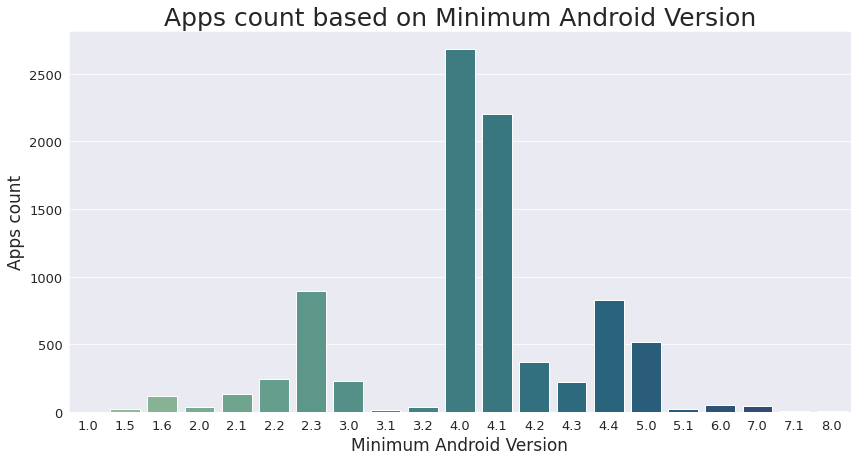

In [83]:
# Get barplot of Minimum android version vs App count
plt.xticks(rotation=0)
sns.barplot(Android_Ver_wise['Min Android Ver'],Android_Ver_wise['App'],palette='crest')
plt.xlabel('Minimum Android Version',fontsize=17)
plt.ylabel('Apps count', fontsize=17)
plt.title("Apps count based on Minimum Android Version",fontsize = 25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


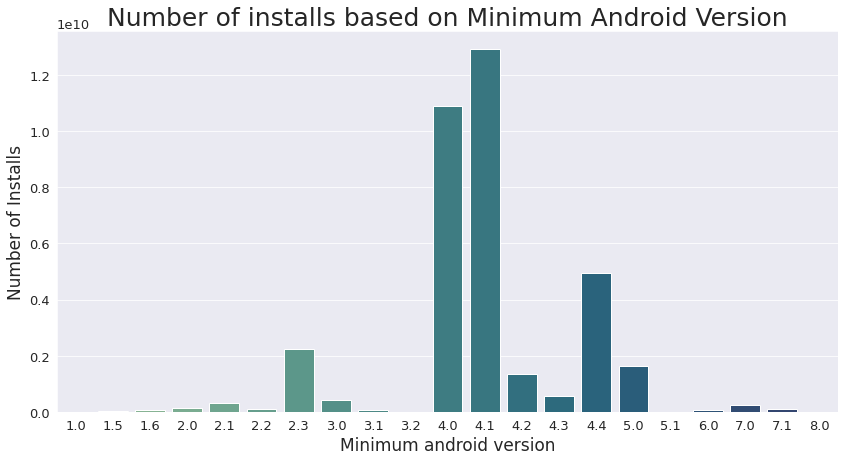

In [84]:
# Get barplot of Minimum android version vs Number of installations
plt.xticks(rotation=0)
sns.barplot(Android_Ver_wise['Min Android Ver'],Android_Ver_wise['Installs'],palette='crest')
plt.xlabel('Minimum android version',fontsize=17)
plt.ylabel('Number of Installs', fontsize=17)
plt.title("Number of installs based on Minimum Android Version",fontsize = 25)
plt.show()

#### **Observation: The minimum android version support till android 4.0 appears to be the choice of most app-makers.**


###**b) Q.7) Does App size increases with higher Min Android Version support**


In [85]:
# Use cut to create Min android range which will help show clearer trend
Android_Ver_Size =Android_Ver_wise.groupby(pd.cut(Android_Ver_wise['Min Android Ver'], np.arange(0, 8.00+1.00, 1))).agg({'App':'sum','Reviews':'sum','Installs':'sum','Size':'mean'}).reset_index().sort_values('App',ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


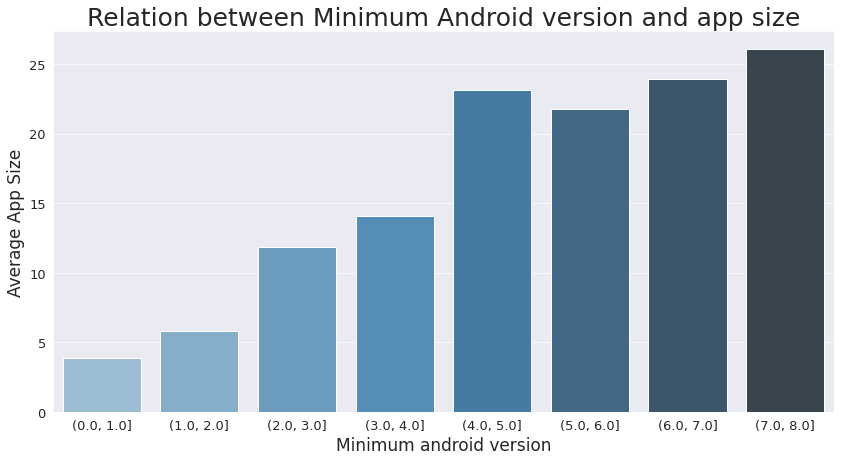

In [86]:
# Plot the bar chart
plt.xticks(rotation=0)
sns.barplot(Android_Ver_Size['Min Android Ver'],Android_Ver_Size['Size'],palette="Blues_d")
plt.xlabel('Minimum android version',fontsize=17)
plt.ylabel('Average App Size', fontsize=17)
plt.title("Relation between Minimum Android version and app size",fontsize = 25)
plt.show()

####**Observation: App size increases with higher Min Android Version support.**


## **5) Analysis based on "Category" feature**


In [87]:
# Groupby category and store it in category_wise DataFrame
category_wise = play_store_df[['Category','App','Rating','Reviews','Installs','Size']].groupby("Category").agg({'Rating':'mean','App':'count','Reviews':'sum','Installs':'sum','Size':'mean'}).reset_index().rename(columns={'Category':'Category'}).sort_values('App',ascending=False)

In [88]:
category_wise.head()

,Category,Rating,App,Reviews,Installs,Size
11,FAMILY,4.184220,1879,193565476,6237642508,27.308443
14,GAME,4.243352,942,588950809,13377924415,41.730361
29,TOOLS,4.039917,828,229430860,8002771915,8.771132
4,BUSINESS,4.098479,420,9891023,697164866,13.867207
20,MEDICAL,4.166552,395,1182987,38193178,19.189429


###**a)App count for each category**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


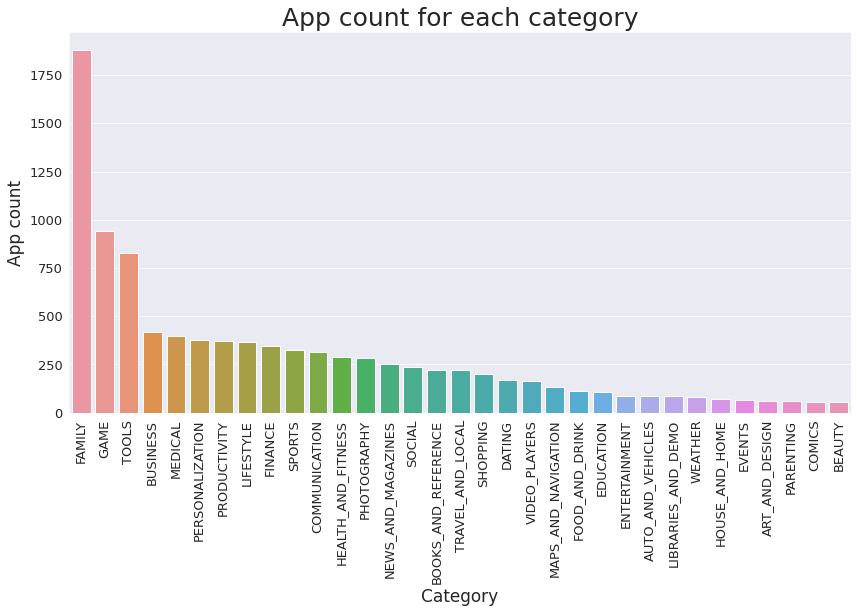

In [89]:
# Obtain the plot of App count for each category
plt.xticks(rotation=90)
sns.barplot(category_wise['Category'],category_wise['App'])
plt.xlabel('Category',fontsize=17)
plt.ylabel('App count', fontsize=17)
plt.title("App count for each category",fontsize = 25)
plt.show()

In [90]:
top_7_category_wise_app_count = category_wise.head(7)

In [91]:
top_7_category_wise_app_count['App'].sum()*100/category_wise['App'].sum()

53.98074334817269

#### **Observation: Here Categories namely Family, Game, Tools, Business, Medical, Personalization and Productivity contributes to 54% of total number of apps**


### **b) Number of Installs for each category**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


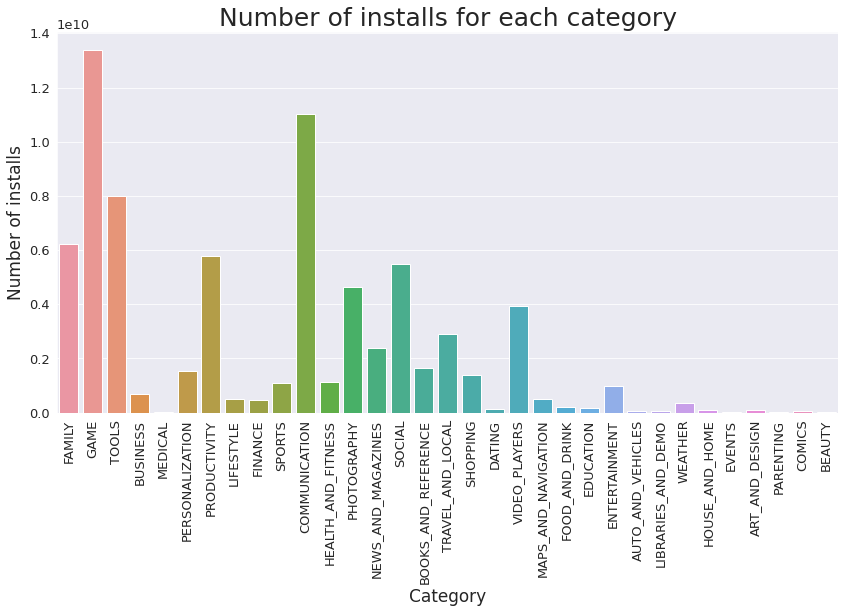

In [92]:
# Obtain the plot of Number of installations for each category
plt.xticks(rotation=90)
sns.barplot(category_wise['Category'],category_wise['Installs'])
plt.xlabel('Category',fontsize=17)
plt.ylabel('Number of installs', fontsize=17)
plt.title("Number of installs for each category",fontsize = 25)
plt.show()

In [93]:
# Add 'Installation_per_app_in_the_category' & 'Reviews_per_app_in_the_category' column to category_wise DataFrame
category_wise['Installation_per_app_in_the_category'] = category_wise['Installs']/category_wise['App']
category_wise['Reviews_per_app_in_the_category'] = category_wise['Reviews']/category_wise['App']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


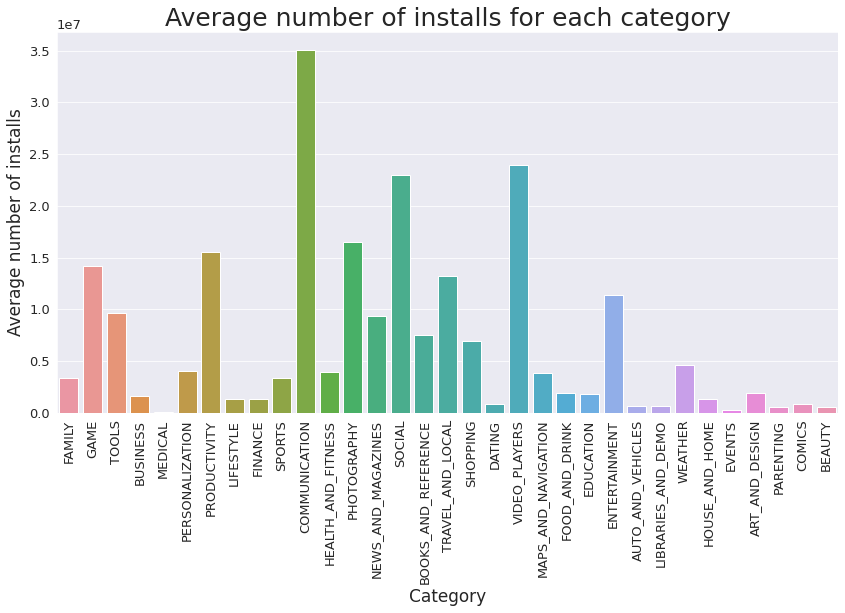

In [94]:
# obtain the plot of Average number of installations for each category
plt.xticks(rotation=90)
sns.barplot(category_wise['Category'],category_wise['Installation_per_app_in_the_category'])
plt.xlabel('Category',fontsize=17)
plt.ylabel('Average number of installs', fontsize=17)
plt.title("Average number of installs for each category",fontsize = 25)
plt.show()

In [95]:
category_wise.sort_values('Installs',ascending=False,inplace=True)

In [96]:
top_8_category_wise_installs = category_wise.head(8)

In [97]:
top_8_category_wise_installs['Installs'].sum()*100/category_wise['Installs'].sum()

77.87010245115222

####**Observation: Here Categories namely Game, Communication, Tools, Family, Productivity, Social, Video players and Photography contributes to 77% of total number of installations.**


###**c) Number of reviews for each category**

In [98]:
category_wise.sort_values('App',ascending=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


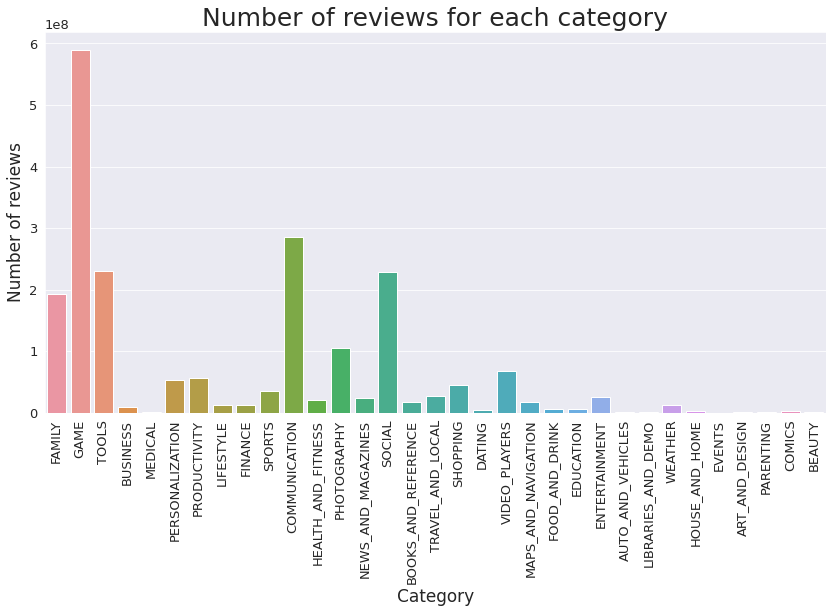

In [99]:
# Obtain the plot of Number of reviews for each category
plt.xticks(rotation=90)
sns.barplot(category_wise['Category'],category_wise['Reviews'])
plt.xlabel('Category',fontsize=17)
plt.ylabel('Number of reviews', fontsize=17)
plt.title("Number of reviews for each category",fontsize = 25)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


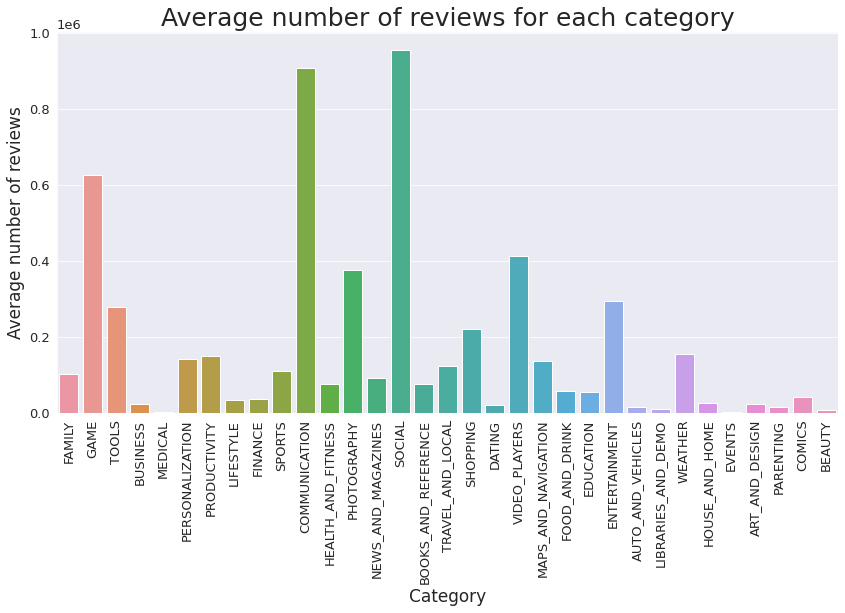

In [100]:
# Obtain the plot of Average number of reviews for each category
plt.xticks(rotation=90)
sns.barplot(category_wise['Category'],category_wise['Reviews_per_app_in_the_category'])
plt.xlabel('Category',fontsize=17)
plt.ylabel('Average number of reviews', fontsize=17)
plt.title("Average number of reviews for each category",fontsize = 25)
plt.show()

####**Observation: Apps from categories Game, Communication, Photography, Social and Video players were able to engage users the most.**


###**d) Avg app size for each category**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


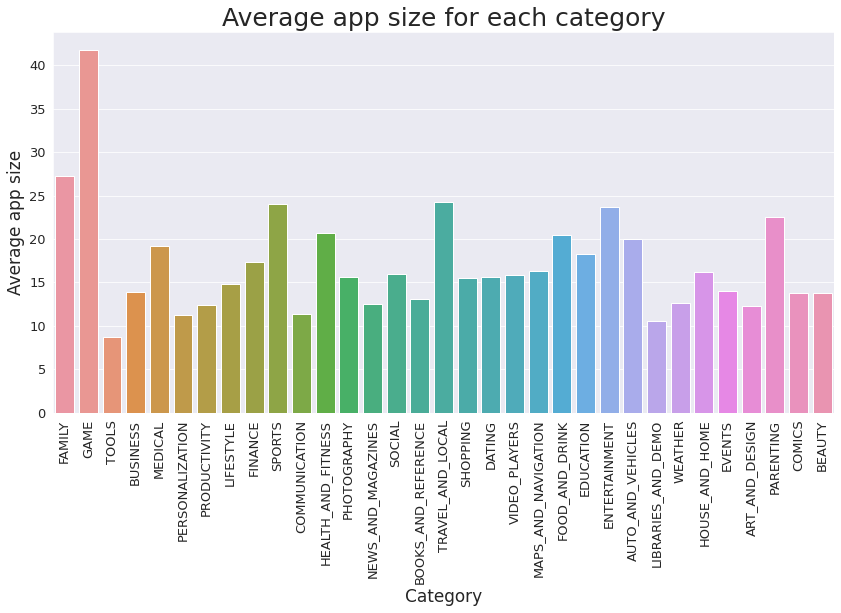

In [101]:
# Obtain the plot of Avg app size for each category
plt.xticks(rotation=90)
sns.barplot(category_wise['Category'],category_wise['Size'])
plt.xlabel('Category',fontsize=17)
plt.ylabel('Average app size', fontsize=17)
plt.title("Average app size for each category",fontsize = 25)
plt.show()

#### **Observation: Game category has significantly higher average app size compared to other categories.** 




### **e) Q.8) Most Positively Sentimental Category**

In [102]:
# Combine df and user_reviews_df DataFrame over App
df_with_user_reviews = pd.merge(play_store_df, user_reviews_df, how="inner", on=["App"])

In [103]:
# Obtain category wise sentiment score
category_with_sentiment_score = df_with_user_reviews[['Category','Sentiment_Score']].groupby("Category").agg({'Sentiment_Score':'sum'}).reset_index().rename(columns={'Category':'Category'})

In [104]:
# View the category_with_sentiment_score DataFrame
category_with_sentiment_score.head()

,Category,Sentiment_Score
0,ART_AND_DESIGN,53.469036
1,AUTO_AND_VEHICLES,63.735769
2,BEAUTY,41.150001
3,BOOKS_AND_REFERENCE,99.592152
4,BUSINESS,159.293399


In [105]:
# We want to find average sentiment score i.e. sentiment_score/ number of apps for each category.
# To achieve this, combine category_with_sentiment_score with category_wise DataFrame
category_with_app_sentiment_score = pd.merge(category_with_sentiment_score , category_wise, how="inner", on=["Category"])

In [106]:
# View the category_with_app_sentiment_score DataFrame
category_with_app_sentiment_score.head()

,Category,Sentiment_Score,Rating,App,Reviews,Installs,Size,Installation_per_app_in_the_category,Reviews_per_app_in_the_category
0,ART_AND_DESIGN,53.469036,4.359322,61,1410046,113238101,12.237288,1.856362e+06,23115.508197
1,AUTO_AND_VEHICLES,63.735769,4.190411,85,1163666,53130211,20.037067,6.250613e+05,13690.188235
2,BEAUTY,41.150001,4.278571,53,396240,27197050,13.795745,5.131519e+05,7476.226415
3,BOOKS_AND_REFERENCE,99.592152,4.344970,222,16722873,1665969576,13.134691,7.504367e+06,75328.256757
4,BUSINESS,159.293399,4.098479,420,9891023,697164866,13.867207,1.659916e+06,23550.054762


In [107]:
# Create Avg sentiment score column
category_with_app_sentiment_score['Avg_Sentiment_Score'] = category_with_app_sentiment_score['Sentiment_Score']/category_with_app_sentiment_score['App']

In [108]:
# View the DataFrame
category_with_app_sentiment_score.head()

,Category,Sentiment_Score,Rating,App,Reviews,Installs,Size,Installation_per_app_in_the_category,Reviews_per_app_in_the_category,Avg_Sentiment_Score
0,ART_AND_DESIGN,53.469036,4.359322,61,1410046,113238101,12.237288,1.856362e+06,23115.508197,0.876542
1,AUTO_AND_VEHICLES,63.735769,4.190411,85,1163666,53130211,20.037067,6.250613e+05,13690.188235,0.749833
2,BEAUTY,41.150001,4.278571,53,396240,27197050,13.795745,5.131519e+05,7476.226415,0.776415
3,BOOKS_AND_REFERENCE,99.592152,4.344970,222,16722873,1665969576,13.134691,7.504367e+06,75328.256757,0.448613
4,BUSINESS,159.293399,4.098479,420,9891023,697164866,13.867207,1.659916e+06,23550.054762,0.379270


In [109]:
# Sort by App 
category_with_app_sentiment_score.sort_values('App',ascending =False,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


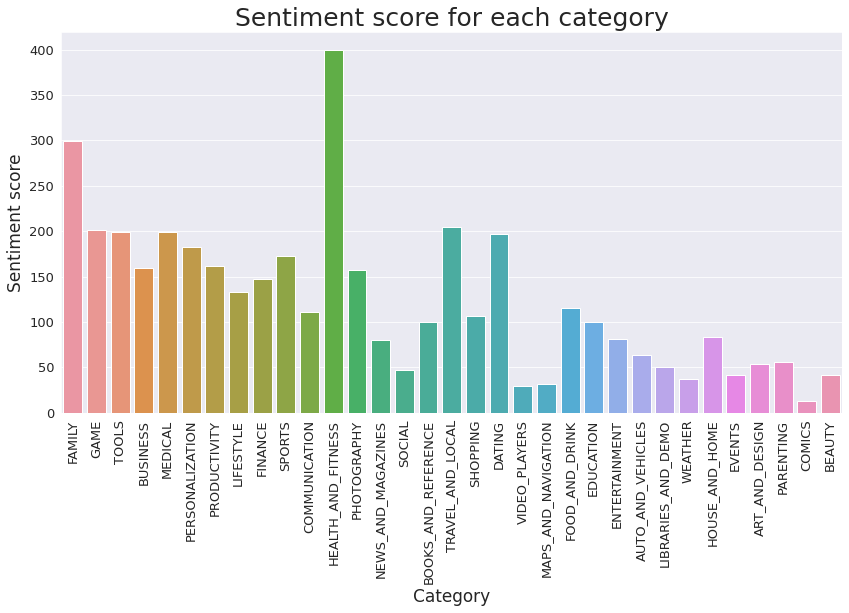

In [110]:
# Plot Category vs Sentiment score
plt.xticks(rotation=90)
sns.barplot(category_with_app_sentiment_score['Category'],category_with_app_sentiment_score['Sentiment_Score'])
plt.xlabel('Category',fontsize=17)
plt.ylabel('Sentiment score', fontsize=17)
plt.title("Sentiment score for each category",fontsize = 25)
plt.show()

#### **Observation: Health and fitness is the most positively sentimental category.**

### **f) Q.9) What are the possible "Next 5 popular category"?**


> We have our current popular category, but which are the next is the question. Based on average sentiment score and with careful manipulation come at the answer.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


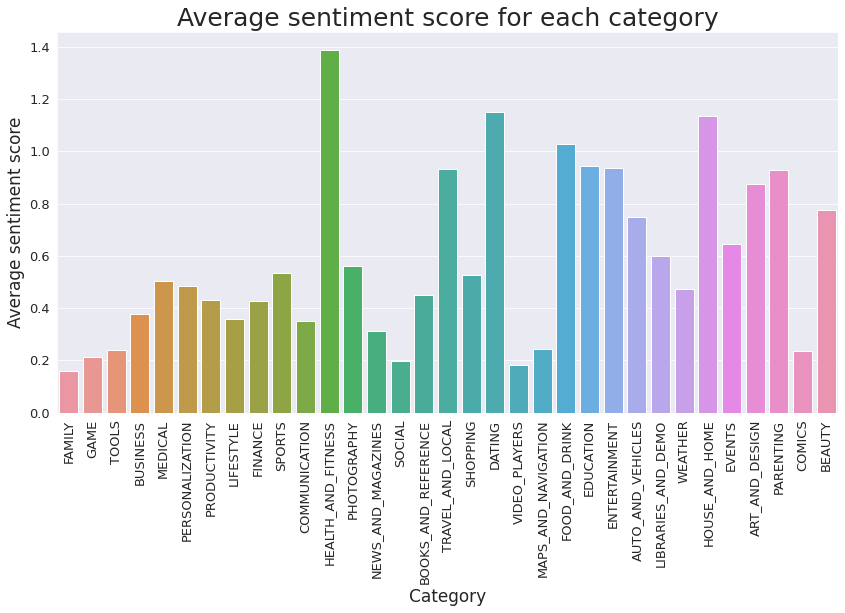

In [111]:
# Plot Category vs Average Sentiment score
plt.xticks(rotation=90)
sns.barplot(category_with_app_sentiment_score['Category'],category_with_app_sentiment_score['Avg_Sentiment_Score']).set(ylabel="Sentiment_Score",title="Sentiment score for each category")
plt.xlabel('Category',fontsize=17)
plt.ylabel('Average sentiment score', fontsize=17)
plt.title("Average sentiment score for each category",fontsize = 25)
plt.show()

Conclusion: All categories have positive sentiment score

In [112]:
# Obtain top 5 next popular category which will help app makers to take actions according to users sentiment
category_with_app_sentiment_score[category_with_app_sentiment_score['Sentiment_Score']>=100].sort_values('Avg_Sentiment_Score',ascending=False).head()

,Category,Sentiment_Score,Rating,App,Reviews,Installs,Size,Installation_per_app_in_the_category,Reviews_per_app_in_the_category,Avg_Sentiment_Score
15,HEALTH_AND_FITNESS,399.217504,4.243033,288,21365720,1144022512,20.669698,3.972300e+06,74186.527778,1.386172
7,DATING,196.432054,3.970149,171,3623899,140926107,15.661132,8.241293e+05,21192.391813,1.148725
13,FOOD_AND_DRINK,115.288821,4.171277,112,6326064,211798751,20.494318,1.891060e+06,56482.714286,1.029364
8,EDUCATION,100.105355,4.353333,106,5788464,189451000,18.327722,1.787274e+06,54608.150943,0.944390
30,TRAVEL_AND_LOCAL,204.087945,4.069519,219,26821349,2894887147,24.204393,1.321866e+07,122471.913242,0.931908


#### **Concluson: Travel and local, Health and fitness, Food and drink, Education and finally Dating may be the part of next popular categories.**


### **g) Rating of each category**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


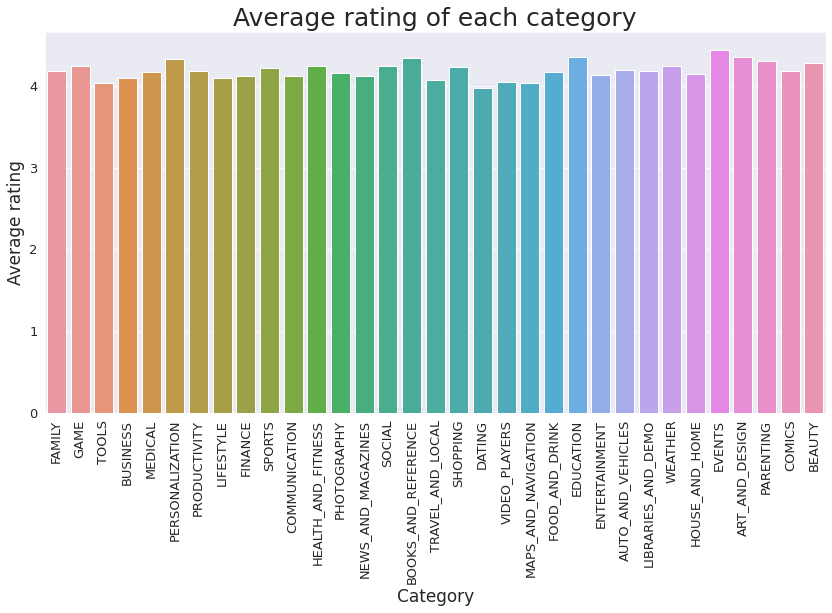

In [113]:
# Obtain category vs rating plot
plt.xticks(rotation=90)
sns.barplot(category_wise['Category'],category_wise['Rating'])
plt.xlabel('Category',fontsize=17)
plt.ylabel('Average rating', fontsize=17)
plt.title("Average rating of each category",fontsize = 25)
plt.show()

#### **Concluson: All categories are rated very good on average.**


## **6) Analysis of 'Paid' Type Apps**


> Success of 'Paid' Type Apps




### **a) Percentage of "PAID" type vs "FREE" type apps**

In [114]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log
0,GollerCepte Live Score,SPORTS,4.2,9992,31.00,1000000,Free,0.0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,6.00000
1,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,0.09,100000,Free,0.0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,5.00000
2,SnipSnap Coupon App,SHOPPING,4.2,9975,18.00,1000000,Free,0.0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,6.00000
3,US Open Tennis Championships 2018,SPORTS,4.0,9971,33.00,1000000,Free,0.0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,6.00000
4,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22.00,500000,Free,0.0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,5.69897


In [115]:
# Adding a Revenue Column
play_store_df['Earnings'] = play_store_df['Installs']*play_store_df['Price($)']

In [116]:
play_store_df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

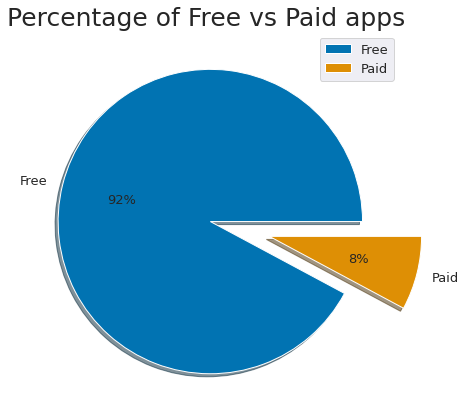

In [117]:
# Preparation for Pie Plot
#define data
data = (play_store_df[play_store_df['Type'] == 'Free']['Type'].count(),play_store_df[play_store_df['Type'] == 'Paid']['Type'].count())
labels = ['Free', 'Paid']

#define Seaborn color palette to use
colors = sns.color_palette('colorblind')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors,explode=[0,0.4], shadow = True, autopct='%.0f%%')
plt.title("Percentage of Free vs Paid apps ", fontsize = 25)
plt.rcParams['figure.figsize'] = (14, 7)
plt.legend()
plt.show()

####**Observation: Only 8% of total apps on the play store are paid apps.**


### **b) Average Installations attributed by App Type**


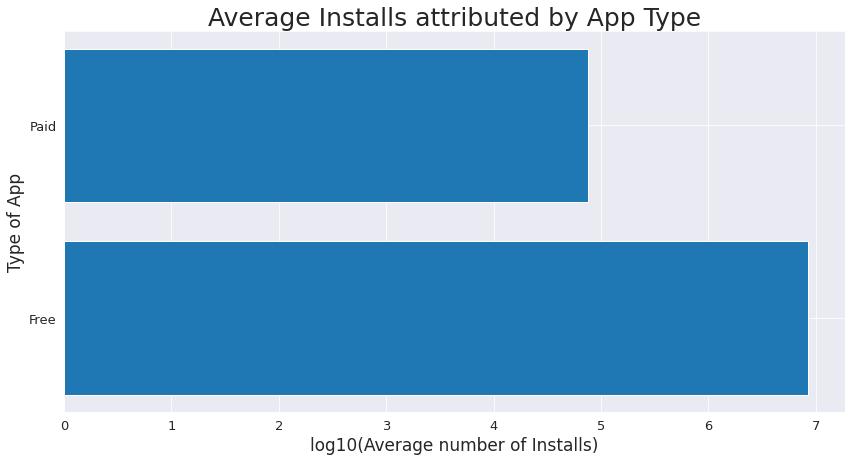

In [118]:
# Preparation for Pie Plot
#define data
data = (np.log10(play_store_df[play_store_df['Type'] == 'Free']['Installs'].sum()/play_store_df[play_store_df['Type'] == 'Free']['Type'].count()), np.log10(play_store_df[play_store_df['Type'] == 'Paid']['Installs'].sum()/play_store_df[play_store_df['Type'] == 'Paid']['Type'].count()))
labels = ['Free', 'Paid']

plt.barh(labels,data)
plt.xlabel('log10(Average number of Installs)',fontsize=17)
plt.ylabel('Type of App',fontsize=17)
plt.title('Average Installs attributed by App Type',fontsize=25)
plt.show()

####**Observation: Avg number of installations for paid apps is slightly less than 1 lakh while for free apps is slightly less than 1 crore.**


### **c) Category wise App count attributed by their type**


In [119]:
# Groupby using category and type.
category_type_wise = play_store_df[['Category','Type','App','Rating','Reviews','Installs','Size','Earnings']].groupby(["Category","Type"]).agg({'Rating':'mean','App':'count','Reviews':'sum','Installs':'sum','Size':'mean','Earnings':'sum'}).reset_index().rename(columns={'Category':'Category'}).sort_values('App',ascending=False)

In [120]:
# Using pivot function to create a table of index = category, columns = type, values = app
df_app_count = category_type_wise.pivot('Category', 'Type', 'App').fillna(0).reset_index()

In [121]:
# View the DataFrame
df_app_count.head()

Type,Category,Free,Paid
0,ART_AND_DESIGN,58.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,0.0
3,BOOKS_AND_REFERENCE,194.0,28.0
4,BUSINESS,408.0,12.0


In [122]:
# Sort by Paid in descending order
df_app_count.sort_values('Paid',ascending=False,inplace=True)

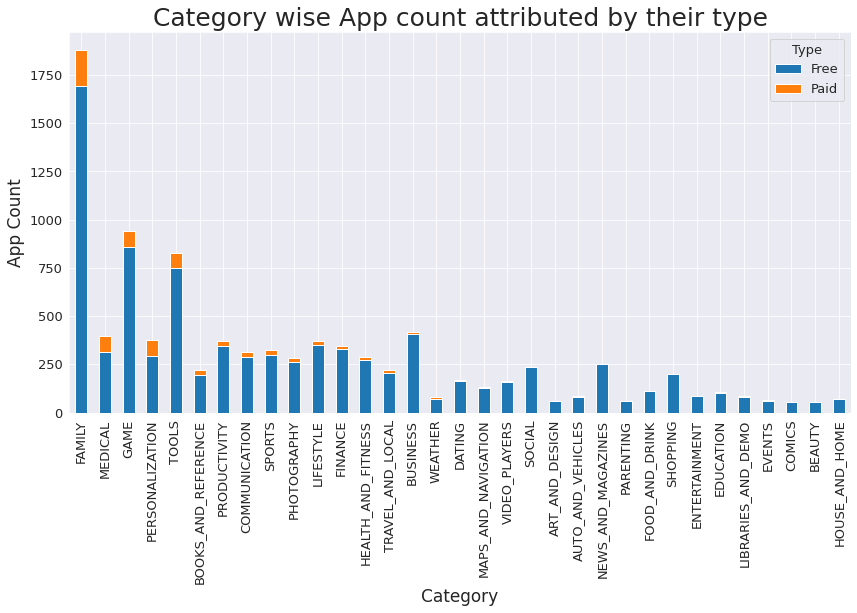

In [123]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(14,7))
plt.xlabel("Category", fontsize=17)
plt.ylabel("App Count", fontsize=17)
plt.title("Category wise App count attributed by their type", fontsize=25)
plt.show()

####**Observation: Family category has most paid type apps.**


### **d) Revenue from Paid Type apps for each category**

In [124]:
category_earnings_through_paid_app = category_type_wise[category_type_wise['Type']=='Paid'][['Category','App','Rating','Reviews','Installs','Size','Earnings']]

In [125]:
category_earnings_through_paid_app['Avg_Earnings'] = category_earnings_through_paid_app['Earnings']/category_earnings_through_paid_app['App']

In [126]:
category_earnings_through_paid_app.head()

,Category,App,Rating,Reviews,Installs,Size,Earnings,Avg_Earnings
21,FAMILY,185,4.289103,3663694,21150816,27.253006,1.156808e+08,625301.839676
38,MEDICAL,83,4.234921,20008,560834,17.657397,5.957736e+06,71779.947831
27,GAME,82,4.372368,1572882,20999965,33.821795,4.068864e+07,496202.888415
44,PERSONALIZATION,81,4.447692,293153,3258795,16.862468,6.796949e+06,83912.951235
56,TOOLS,78,4.169841,171937,1727441,3.707246,5.464821e+06,70061.802436


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


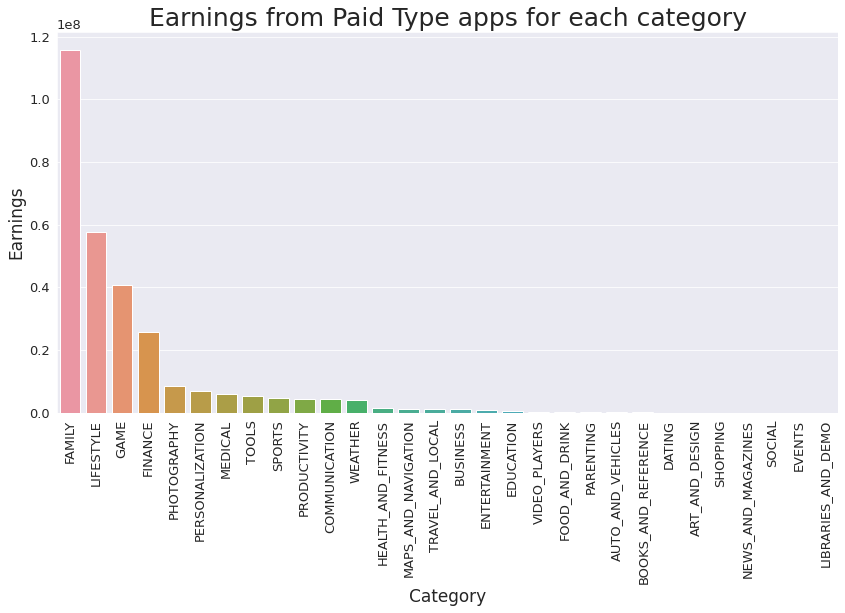

In [127]:
category_earnings_through_paid_app.sort_values('Earnings',ascending=False,inplace=True)

plt.xticks(rotation=90)
sns.barplot(category_earnings_through_paid_app['Category'],category_earnings_through_paid_app['Earnings'])
plt.xlabel("Category", fontsize=17)
plt.ylabel("Earnings", fontsize=17)
plt.title("Earnings from Paid Type apps for each category", fontsize=25)
plt.show()

####**Observation: Family is the category with highest revenue from Paid type apps alone.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


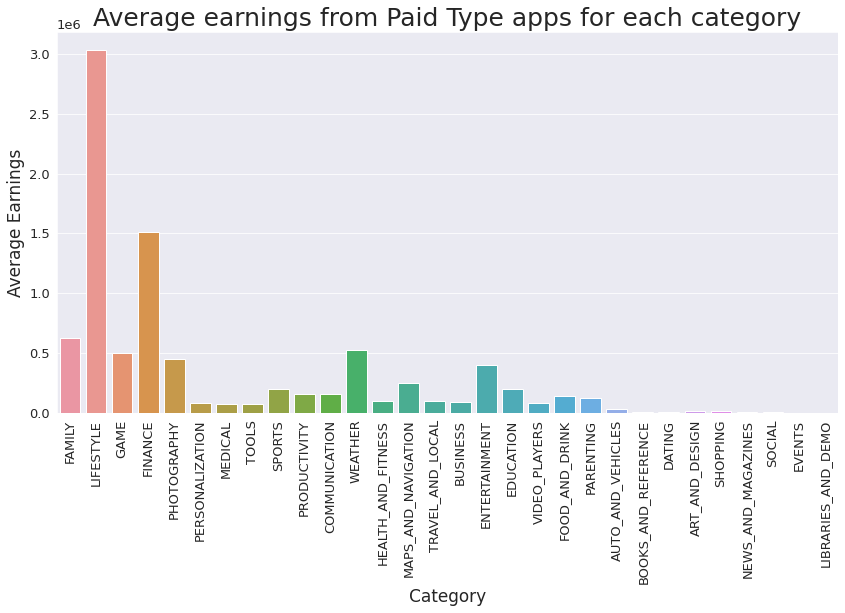

In [128]:
# Obtain average revenue from paid type apps for each category
plt.xticks(rotation=90)
sns.barplot(category_earnings_through_paid_app['Category'],category_earnings_through_paid_app['Avg_Earnings'])
plt.xlabel("Category", fontsize=17)
plt.ylabel("Average Earnings", fontsize=17)
plt.title("Average earnings from Paid Type apps for each category", fontsize=25)
plt.show()

####**Observation: Lifestyle category has the highest average revenue per app.**


### **e) Q.10) Top 10 Paid Apps (based on earnings from installs)**

In [129]:
play_store_df.sort_values('Earnings',ascending=False,inplace=True)

In [130]:
top_10_app_earnings_wise = play_store_df.head(10)

Text(0.5, 1.0, 'Top 10 Paid Apps (based on earnings from installs)')

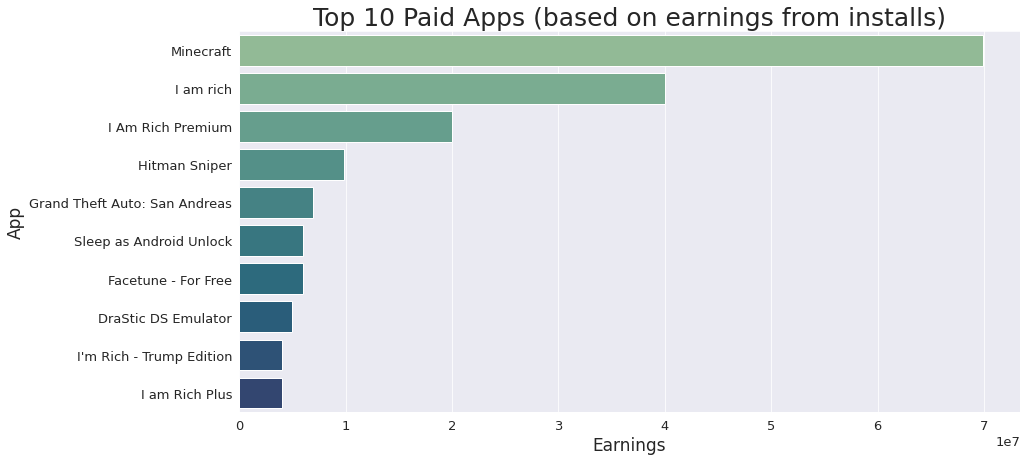

In [131]:
sns.barplot(x=top_10_app_earnings_wise ['Earnings'],y=top_10_app_earnings_wise ['App'],palette='crest')
plt.xlabel('Earnings',fontsize=17)
plt.ylabel('App',fontsize=17)
plt.title('Top 10 Paid Apps (based on earnings from installs)',fontsize=25)

In [132]:
top_10_app_earnings_wise

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Earnings
5499,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,7.00000,69900000.0
3892,I am rich,LIFESTYLE,3.8,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,5.00000,39999000.0
6593,I Am Rich Premium,FINANCE,4.1,1867,4.70,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4.69897,19999500.0
3295,Hitman Sniper,GAME,4.6,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,7.00000,9900000.0
3954,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,6.00000,6990000.0
5479,Sleep as Android Unlock,LIFESTYLE,4.5,23966,0.87,1000000,Paid,5.99,Everyone,Lifestyle,"June 27, 2018",20180608,4.0 and up,6.00000,5990000.0
2637,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up,6.00000,5990000.0
443,DraStic DS Emulator,GAME,4.6,87766,12.00,1000000,Paid,4.99,Everyone,Action,"July 19, 2016",r2.5.0.3a,2.3 and up,6.00000,4990000.0
4951,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.30,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,4.00000,4000000.0
523,I am Rich Plus,FAMILY,4.0,856,8.70,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,4.00000,3999900.0
